# Сравнение сортировок

# Алгоритмы и структуры данных, ВШЭ, 2020/2021

# Зыль Ирина, БПИ192

Общие моменты:
* Для анализа были выбраны:
    * Три итерационные сортировки: пузырьком (без оптимизаций), выбором и бинарными вставками.
    * Две линейные сортировки: подсчётом и цифровая.
    * Три рекурсивные сортировки: слиянием, пирамидальная и быстрая сотрировка с разбиением Хоара.
* Виды экспериментов создавались в соответствии с заданием.
* Каждый эксперимент запускался 73 раза (3 из них - вхолостую, для оптимизации компилятором).
* У всех функций сортировок была сделана одна сигнатура с целью единого образа обращения к ним. Поэтому некоторые параметры в некоторых сортировках могут быть излишни.
* Так же все сортировки на каждом массиве проверяются на правильность. За время экспериментов не было ни разу, чтобы сортировки сработали неверно, что даёт гарантию корректности их работы.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("192_ZylIV_results_table.csv",
                   sep=";")
data

Array length  Bubble Sort | Random 0-5  Bubble Sort | Random 0-4000  \
0            50              3.343000e+04                 2.992714e+04   
1           100              1.392900e+05                 1.158000e+05   
2           150              2.799400e+05                 2.578314e+05   
3           200              4.081029e+05                 4.547829e+05   
4           250              6.367500e+05                 7.104614e+05   
5           300              1.411457e+06                 1.058594e+06   
6          1100              1.503523e+07                 1.377708e+07   
7          2100              4.834021e+07                 4.867036e+07   
8          3100              9.765312e+07                 1.121375e+08   
9          4100              1.766086e+08                 2.070763e+08   

   Bubble Sort | Almost sorted  Bubble Sort | Reversed  \
0                 1.544286e+04            3.897429e+04   
1                 6.205714e+04            1.511929e+05   
2                 1.272514e+05            3.435471e+05   
3                 2.107100e+05            6.103000e+05   
4                 3.346171e+05            9.428343e+05   
5                 4.674529e+05            1.383281e+06   
6                 6.187914e+06            1.906485e+07   
7                 2.243349e+07            6.787118e+07   
8                 5.247203e+07            1.511182e+08   
9                 8.974158e+07            2.893247e+08   

   Select Sort | Random 0-5  Select Sort | Random 0-4000  \
0              1.808857e+04                 1.582571e+04   
1              7.765143e+04                 5.796000e+04   
2              1.358429e+05                 1.283429e+05   
3              2.124586e+05                 2.057129e+05   
4              4.409700e+05                 3.379657e+05   
5              5.753129e+05                 4.780157e+05   
6              6.786051e+06                 7.230853e+06   
7              2.227595e+07                 2.228412e+07   
8              5.465261e+07                 4.818750e+07   
9              8.495051e+07                 8.954478e+07   

   Select Sort | Almost sorted  Select Sort | Reversed  \
0                 1.392000e+04            1.394143e+04   
1                 5.401286e+04            5.369286e+04   
2                 1.206557e+05            1.158886e+05   
3                 2.235286e+05            2.028614e+05   
4                 3.279443e+05            3.116214e+05   
5                 4.638114e+05            4.655800e+05   
6                 5.964090e+06            6.080713e+06   
7                 2.215347e+07            2.178662e+07   
8                 4.958171e+07            4.888418e+07   
9                 8.312902e+07            8.493303e+07   

   BinaryInsert Sort | Random 0-5  ...  Merge Sort | Almost sorted  \
0                    1.020000e+04  ...                3.594429e+04   
1                    3.476571e+04  ...                7.645000e+04   
2                    5.796000e+04  ...                1.253571e+05   
3                    8.961857e+04  ...                1.669714e+05   
4                    2.583600e+05  ...                2.053129e+05   
5                    2.551586e+05  ...                2.610971e+05   
6                    2.858629e+06  ...                1.090086e+06   
7                    9.690451e+06  ...                2.085927e+06   
8                    2.194125e+07  ...                3.462210e+06   
9                    3.495618e+07  ...                4.736693e+06   

   Merge Sort | Reversed  Quick Sort | Random 0-5  Quick Sort | Random 0-4000  \
0           3.453429e+04              6255.714286                 5264.285714   
1           7.815286e+04             14131.428571                11362.857143   
2           1.160314e+05             18140.000000                21477.142857   
3           1.606200e+05             23902.857143                25194.285714   
4           2.360429e+05             43240.000000                35421.42

In [3]:
print('\n'.join(data.columns))

Array length
Bubble Sort | Random 0-5
Bubble Sort | Random 0-4000
Bubble Sort | Almost sorted
Bubble Sort | Reversed
Select Sort | Random 0-5
Select Sort | Random 0-4000
Select Sort | Almost sorted
Select Sort | Reversed
BinaryInsert Sort | Random 0-5
BinaryInsert Sort | Random 0-4000
BinaryInsert Sort | Almost sorted
BinaryInsert Sort | Reversed
Counting Sort | Random 0-5
Counting Sort | Random 0-4000
Counting Sort | Almost sorted
Counting Sort | Reversed
Radix Sort | Random 0-5
Radix Sort | Random 0-4000
Radix Sort | Almost sorted
Radix Sort | Reversed
Merge Sort | Random 0-5
Merge Sort | Random 0-4000
Merge Sort | Almost sorted
Merge Sort | Reversed
Quick Sort | Random 0-5
Quick Sort | Random 0-4000
Quick Sort | Almost sorted
Quick Sort | Reversed
Heap Sort | Random 0-5
Heap Sort | Random 0-4000
Heap Sort | Almost sorted
Heap Sort | Reversed


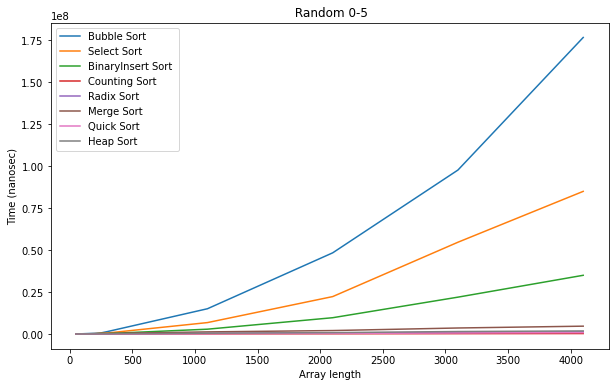

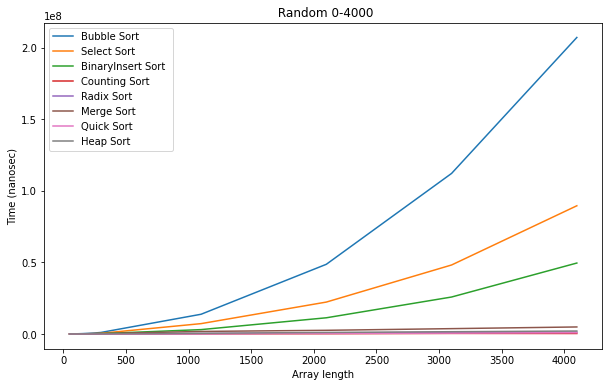

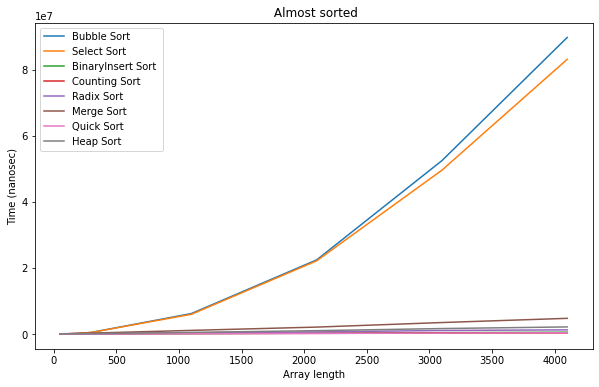

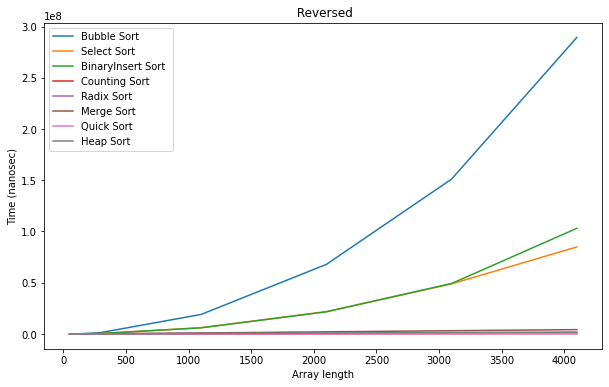

In [4]:
for type in range(1, 5):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    legend = []
    for sort in range(0, 8):
        plt.plot(data['Array length'], data[data.columns[type + sort*4]])
        legend.append(data.columns[type + sort*4].split('|')[0])
    plt.title(data.columns[type].split('|')[1])
    plt.xlabel("Array length")
    plt.ylabel("Time (nanosec)")
    plt.legend(legend)
    plt.show()

Видим, что в силу сильной разницы в скорости работы сортировок часть линий оказались слишком близко к оси и различить их трудно. Поэтому изобразим на отдельных графиках итерационные сортировки и все остальные.

Итерационные сортировки в зависимости от типа массива:

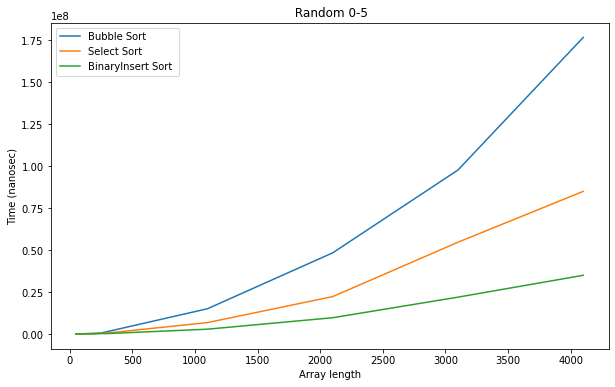

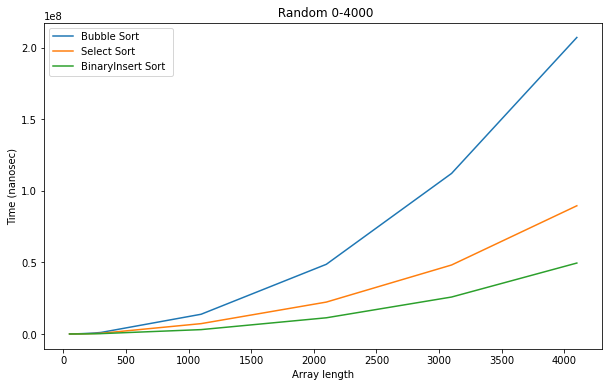

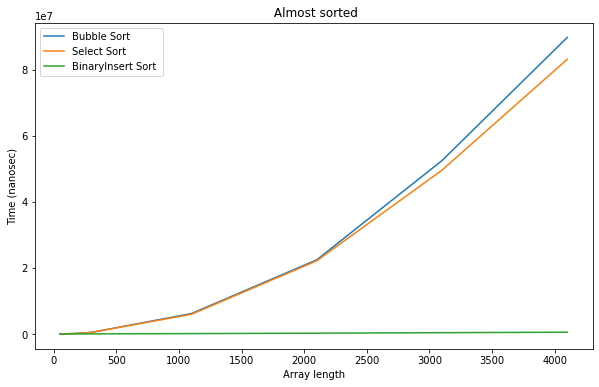

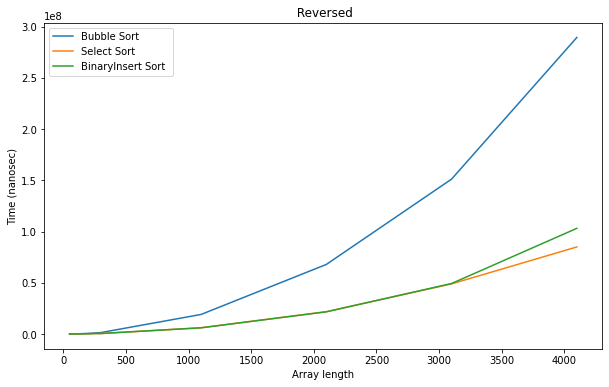

In [5]:
for type in range(1, 5):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    legend = []
    for sort in range(0, 3):
        plt.plot(data['Array length'], data[data.columns[type + sort*4]])
        legend.append(data.columns[type + sort*4].split('|')[0])
    plt.title(data.columns[type].split('|')[1])
    plt.xlabel("Array length")
    plt.ylabel("Time (nanosec)")
    plt.legend(legend)
    plt.show()

Вывод по итерационным сортировкам:

* Видим, что сортировка пузырьком всегда является самой медленной. Это обусловлено тем, что пузырёк в данном исследовании совершенно никак не оптимизирован и проходит все пары элементов. Это неэффективно. 
* Сортировка выбором работает похожим образом, однако быстрее как минимум за счёт того, что совершает меньше обменов.
* Сортировка бинарными вставками почти всегда лидирует по производительности.

Зависимость от размера массивов:
* На рандомных элементах сортировки просто ведут себя ожидаемо (верхние пункты). 
* На почти отсортированном массиве сортировка бинарными вставками сильно лидирует (почти константное время). Это обусловлено тем, что в основном происходит только поиск позиции и почти не происходит сдвигов элементов для вставки. Пузырёк тоже работет быстрее, так как почти не делает обменов. 
* На массиве с обратным порядком пузырьку совсем плохо, потому что ему нужно постоянно производить обмен чуть ли не всех элементов. Бинарные вставки тоже работают медленнее, так как постоянно приходится делать сдвиги. Сортировка вставками также делает большее число обменов.

Линейные и рекурсивные сортировки:

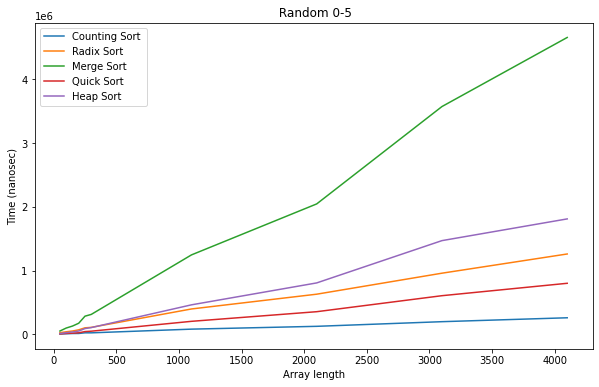

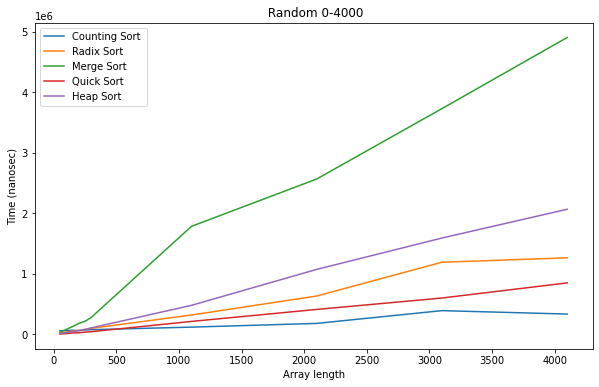

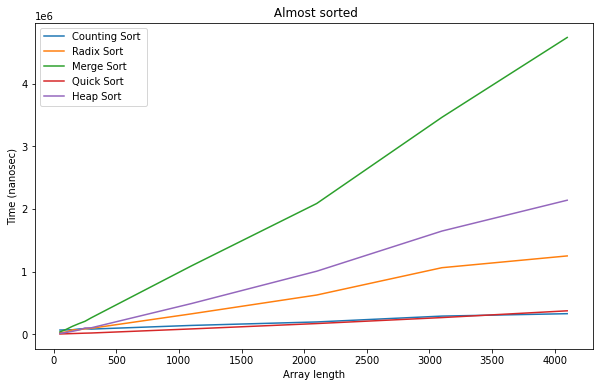

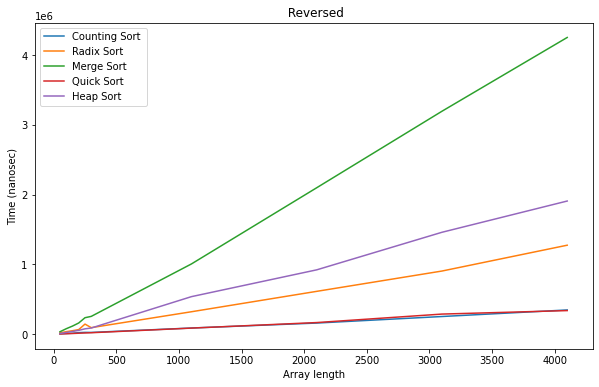

In [6]:
for type in range(1, 5):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    legend = []
    for sort in range(3, 8):
        plt.plot(data['Array length'], data[data.columns[type + sort*4]])
        legend.append(data.columns[type + sort*4].split('|')[0])
    plt.title(data.columns[type].split('|')[1])
    plt.xlabel("Array length")
    plt.ylabel("Time (nanosec)")
    plt.legend(legend)
    plt.show()

Из данных графиков можно сделать следующие умозаключения:
* Для начала общие черты:
    * В целом все сортировки почти во всех эксперементах выстроились в одинаковом порядке по скорости. Лидируют сортировка подсчётом и быстрая сортировка, затем идут цифровая и пирамидальная сортировки, и самой медленной во всех случая оказывается сортировка слиянием.
    * Так же видим, что вне зависимости от типов массивов, общий порядок количества времени одинаков.
* Теперь про каждую из сортировок:
    * Так как значения чисел в массивах небольшие, то линейные сортировки работают довольно быстро и эффективно, так как, в частности, вспомогательные массивы получаются небольшими.
    * Значительная разница в рекурсивных сортировках (в частности, в производительности быстрой сортировки и сортировки слиянием) может заключаться в том, каким образом организована рекурсия. Возможно, компилятору удается эффективно соптимизировать хвостовую рекурсию быстрой сортировки, в то время как с сортировкой слиянием это не проходит. К тому же тут очень сильно влияет реализация. В частности, в сортировка слиянием происходит копирование массива, что увеличивает константу в сложности и делает сортировку медленнее относительно быстрой.
* Про виды массивов:
    * На рандомных элементах динамика одинаковая.
    * На почти отсортированном массиве быстрая сортировка работает быстрее, что обосновывается меньшим количеством обменов.

Второй тип анализа: по каждой из сортировок.

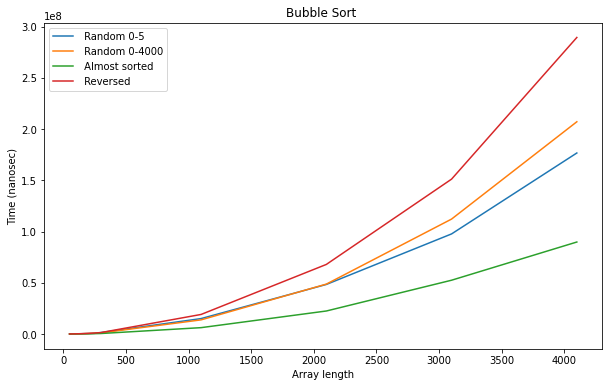

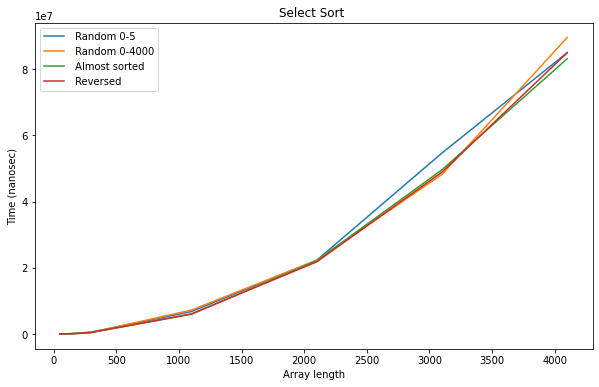

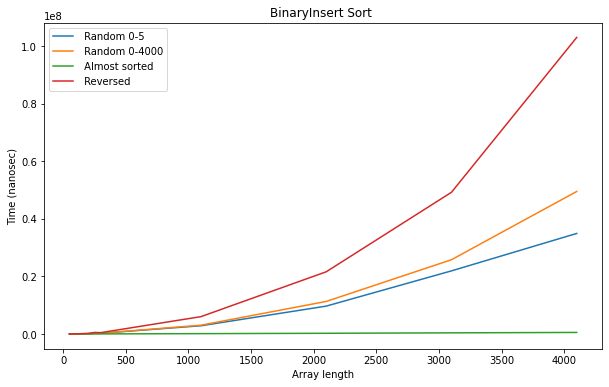

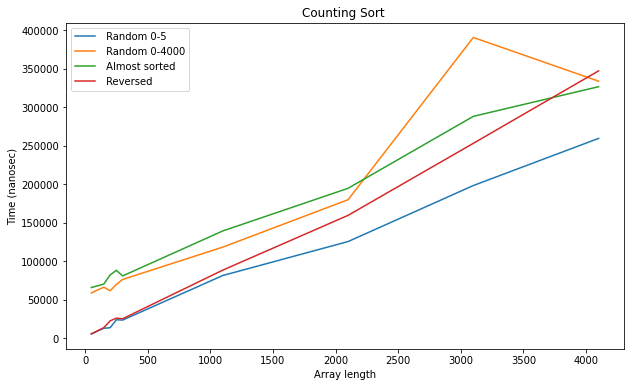

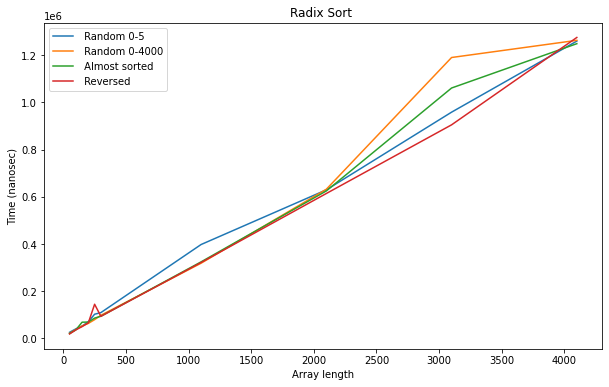

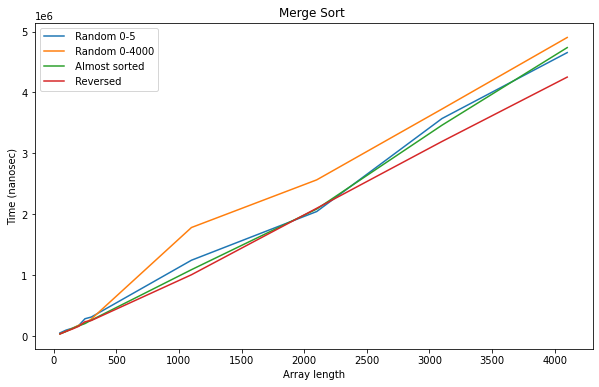

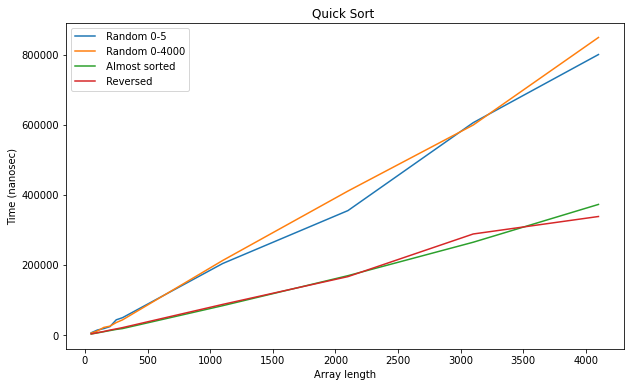

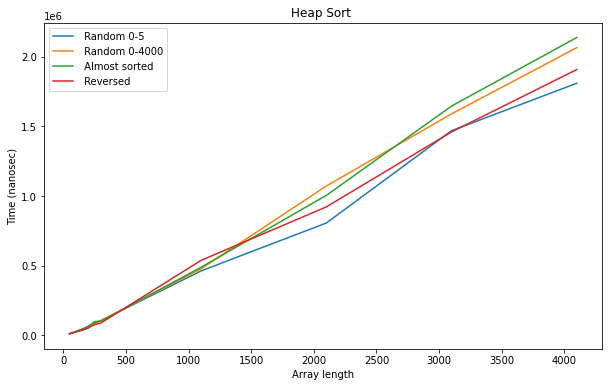

In [7]:
for sort in range(0, 8):
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    legend = []
    for type in range(1, 5):
        plt.plot(data['Array length'], data[data.columns[sort*4 + type]])
        legend.append(data.columns[sort*4 + type].split('|')[1])
    plt.title(data.columns[sort*4 + 1].split('|')[0])
    plt.xlabel("Array length")
    plt.ylabel("Time (nanosec)")
    plt.legend(legend)
    plt.show()

Сортировка пузырьком:
   
* Очевидно, что дольше всего работает при обратно отсортированном массиве, так как приходится делать гораздо больше обменов. И так же очевидно, что лучший случай - почти отсортированный массив, так как обменов наименьшее количество.

Сортировка выбором:
* Ей, по факту, не принциписально какой массив. Конечно, обменов меньше в случае почти сортированного массива, но, как видим, это не сильно влияет на скорость.

Сортировка бинарными вставками:
* Выше уже было описано, что лучший случай - когда массив почти отсортированный и худший - отсортированный в обратном порядке. Как и говорилось, это обусловлено тем, как мы вставляем и сколько элементов нужно сдвигать, чтобы поместить элемент на нужное место. В первом случае нам этого делать почти не надо и мы тратим время только на поиск позиции (а не надо потому, что число будет вставляться в конец отсортированной части), во втором случае всё ровно наоборот.

Сортировка подсчётом:
* Тут самая сильная зависимость в размере элементов массива. Чем они меньше, тем быстрее работает сортировка, потому что вспомогательный массив меньшего размера. А то, как именнно расположены элементы между собой, исходя из эксперимента, не так значительно. Можем видеть, что линии с рандомными элементами от 0 до 4000 и сортированным массивом (где элементы в пределах от 0 до 4100) почти совпадают (ещё раз подтверждает теорию). И так же можем видеть, что чем больше размер массива, отсортированного в обратном порядке (а, значит, чем больше диапазон чисел в нём), тем медленнее сортировка (снова подтверждает зависимость). Экстремум на рандомных элементах большого диапазона, скорее всего, связан с кэшем, потому что рандомные элементы в данном виде сортировки как раз самые не cash-friendly, так как обращение к ячейкам вспомогательного массива происходит хаотично.

Цифровая сортировка:
* На массивах с таким диапазоном чисел ей вообще почти все равно. Отчасти сохраняется принцип из сортировки подсчётом, только теперь ещё и разница между порядками чисел почти нивелируется.

Сортировка слиянием:
* Тоже видим, что разница между видами массивов небольшая в силу принципа сортировки.

Быстрая сортировка с разбиением Хоара:
* Работает одинаково и медленнее, когда массив никак не упорядочен, при этом значения чисел не важны. Работает быстрее, когда массив упорядочен. Это связано с тем, что мы почти всегда берем медиану, что для нас выгоднее.

Пирамидальная сортировка:
* Работает чуть лучше на небольшом диапазоне элементов (то есть когда много повторений элементов), так как делается меньше обменов в силу невыполнения строгих неравенств. Быстродействие в случае реверсд-массива по сравнению с прямоотсортированным может быть в том, что при построении кучи надо делать меньше операций, так как элементы уже идут в невозрастающем порядке.